In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import sklearn
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import linear_model
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format


In [2]:
crime = pd.read_csv('Prepare the Data DRILL.csv')
crime.head()

,City,Population,Violent crime,Murder,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,"1,861",0,0.000,nan,0,0,0,12,2,10,0,0.000
1,Addison Town and Village,"2,577",3,0.000,nan,0,0,3,24,3,20,1,0.000
2,Akron Village,"2,846",3,0.000,nan,0,0,3,16,1,15,0,0.000
3,Albany,"97,956",791,8.000,nan,30,227,526,"4,090",705,"3,243",142,nan
4,Albion Village,"6,388",23,0.000,nan,3,4,16,223,53,165,5,nan


In [3]:
#The purpose of this is to separate the commas out of the numbers that is more than 1,000.
def convert_number(number):
    try:
        converted = float(number.replace(',', ''))
    except:
        converted = number
    return converted

In [5]:
crime.dtypes

City                             object
Population                       object
Violent\ncrime                   object
Murder                          float64
Rape\n(revised\ndefinition)1    float64
Rape\n(legacy\ndefinition)2      object
Robbery                          object
Aggravated\nassault              object
Property\ncrime                  object
Burglary                         object
Larceny-\ntheft                  object
Motor\nvehicle\ntheft            object
Arson3                          float64
dtype: object

In [7]:
#This is to make the numbers permanently without the commas
crime['Population'] = crime['Population'].apply(lambda x: convert_number(x))
crime['Murder'] = crime['Murder'].apply(lambda x: convert_number(x))
crime['Robbery'] = crime['Robbery'].apply(lambda x: convert_number(x))
crime['Violent\ncrime'] = crime['Violent\ncrime'].apply(lambda x: convert_number(x))
crime['Property\ncrime'] = crime['Property\ncrime'].apply(lambda x: convert_number(x))
crime['Larceny-\ntheft'] = crime['Larceny-\ntheft'].apply(lambda x: convert_number(x))

In [9]:
#I'm making a new column to make robbery and murder categorial.
#1=Murder or Robbery Existed in that county 0=Murder or Robbery DID NOT Exist
crime['Robbery?'] = np.where(crime['Robbery']>0, 1, 0)
crime['Murder?'] = np.where(crime['Murder']>0, 1, 0)

In [10]:
crime.head()

,City,Population,Violent crime,Murder,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,Robbery?,Murder?
0,Adams Village,1861.000,0.000,0.000,nan,0,0.000,0,12.000,2,10.000,0,0.000,0,0
1,Addison Town and Village,2577.000,3.000,0.000,nan,0,0.000,3,24.000,3,20.000,1,0.000,0,0
2,Akron Village,2846.000,3.000,0.000,nan,0,0.000,3,16.000,1,15.000,0,0.000,0,0
3,Albany,97956.000,791.000,8.000,nan,30,227.000,526,4090.000,705,3243.000,142,nan,1,1
4,Albion Village,6388.000,23.000,0.000,nan,3,4.000,16,223.000,53,165.000,5,nan,1,0


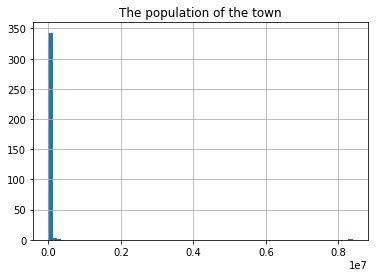

The median:  7233.5
The mean: 40037.63218390805
The standard deviation:  450037.3675209857
Outliers above the limit are:  907308.2350419714


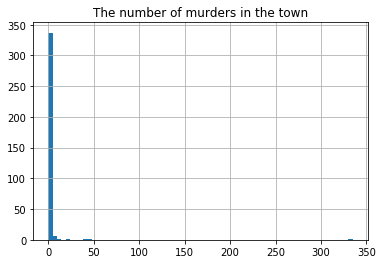

The median:  0.0
The mean: 1.5660919540229885
The standard deviation:  18.303672792887753
Outliers above the limit are:  36.607345585775505


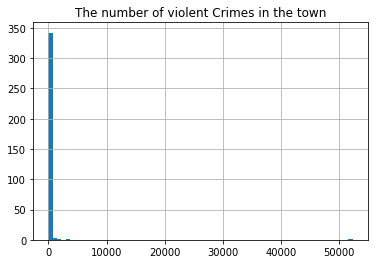

The median:  6.0
The mean: 201.5948275862069
The standard deviation:  2815.268503874344
Outliers above the limit are:  5636.537007748688


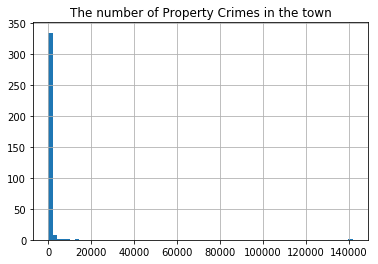

The median:  112.5
The mean: 792.6063218390805
The standard deviation:  7659.724745633149
Outliers above the limit are:  15431.949491266298


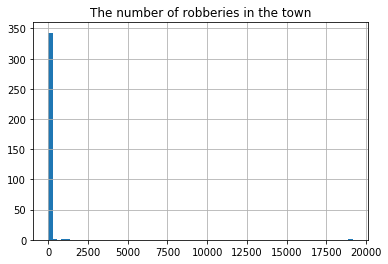

The median:  1.0
The mean: 72.90229885057471
The standard deviation:  1031.0328732955247
Outliers above the limit are:  2063.0657465910494


In [11]:
#Distributing all the variables
crime['Population'].hist(bins=70)
plt.title('The population of the town')
plt.show()

#Mean, Median, Std. Deviation, and outliers
mean = crime.Population.mean()
median = crime.Population.median()
std = crime.Population.std()
population = median + 2*std

print('The median: ', median)
print('The mean:', mean)
print('The standard deviation: ', std)
print('Outliers above the limit are: ', population)

#Distributing all the variables
crime['Murder'].hist(bins=70)
plt.title('The number of murders in the town')
plt.show()

#Mean, Median, Std. Deviation, and outliers
mean = crime.Murder.mean()
median = crime.Murder.median()
std = crime.Murder.std()
murders = median + 2*std

print('The median: ', median)
print('The mean:', mean)
print('The standard deviation: ', std)
print('Outliers above the limit are: ', murders)


#Distributing all the variables
crime['Violent\ncrime'].hist(bins=70)
plt.title('The number of violent Crimes in the town')
plt.show()

#Mean, Median, Std. Deviation, and outliers
mean = crime['Violent\ncrime'].mean()
median = crime['Violent\ncrime'].median()
std = crime['Violent\ncrime'].std()
violentcrimes = median + 2*std

print('The median: ', median)
print('The mean:', mean)
print('The standard deviation: ', std)
print('Outliers above the limit are: ', violentcrimes)

#Distributing all the variables
crime['Property\ncrime'].hist(bins=70)
plt.title('The number of Property Crimes in the town')
plt.show()

#Mean, Median, Std. Deviation, and outliers
mean = crime['Property\ncrime'].mean()
median = crime['Property\ncrime'].median()
std = crime['Property\ncrime'].std()
propertycrimes = median + 2*std

print('The median: ', median)
print('The mean:', mean)
print('The standard deviation: ', std)
print('Outliers above the limit are: ', propertycrimes)

#Distributing all the variables
crime.Robbery.hist(bins=70)
plt.title('The number of robberies in the town')
plt.show()

#Mean, Median, Std. Deviation, and outliers
mean = crime.Robbery.mean()
median = crime.Robbery.median()
std = crime.Robbery.std()
robberies = median + 2*std

print('The median: ', median)
print('The mean:', mean)
print('The standard deviation: ', std)
print('Outliers above the limit are: ', robberies)

In [12]:
#Removing Outliers
crime.Population = crime.Population.map(lambda x: x if x < population else None)
crime.Murder = crime.Murder.map(lambda x: x if x < murders else None)
crime.Robbery = crime.Robbery.map(lambda x: x if x < robberies else None)
crime['Violent\ncrime'] = crime['Violent\ncrime'].map(lambda x: x if x < violentcrimes else None)
crime['Property\ncrime'] = crime['Property\ncrime'].map(lambda x: x if x < propertycrimes else None)

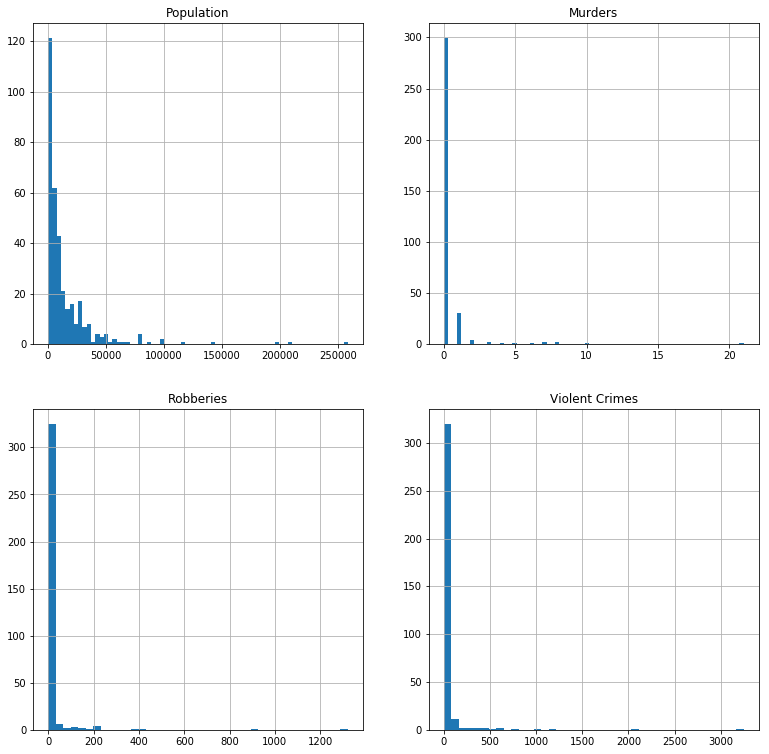

In [13]:
plt.figure(figsize=(13,13))
plt.subplot(221)
crime['Population'].hist(bins=70)
plt.title('Population')

plt.subplot(222)
crime['Murder'].hist(bins=70)
plt.title('Murders')

plt.subplot(223)
crime['Robbery'].hist(bins=40)
plt.title('Robberies')

plt.subplot(224)
crime['Violent\ncrime'].hist(bins=40)
plt.title('Violent Crimes')

plt.show()

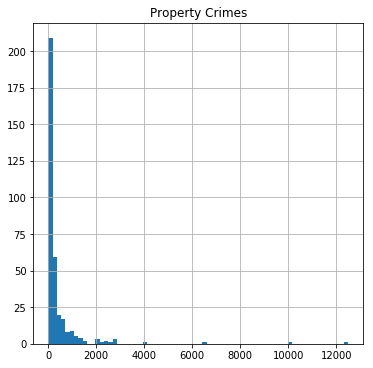

In [14]:
plt.figure(figsize=(13,13))
plt.subplot(221)
crime['Property\ncrime'].hist(bins=70)
plt.title('Property Crimes')

plt.show()